<a href="https://colab.research.google.com/github/sambhajizambre/Project/blob/main/Multilabel_Class_Cuisine_Classification(Rough).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/python/Datafiniti_Fast_Food_Restaurants_May19.csv")

address, city, country, lattitude, longitude, name, postal code, province, website

In [4]:
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   dateAdded          10000 non-null  object 
 2   dateUpdated        10000 non-null  object 
 3   address            10000 non-null  object 
 4   categories         10000 non-null  object 
 5   primaryCategories  10000 non-null  object 
 6   city               10000 non-null  object 
 7   country            10000 non-null  object 
 8   keys               10000 non-null  object 
 9   latitude           10000 non-null  float64
 10  longitude          10000 non-null  float64
 11  name               10000 non-null  object 
 12  postalCode         10000 non-null  object 
 13  province           10000 non-null  object 
 14  sourceURLs         10000 non-null  object 
 15  websites           9918 non-null   object 
dtypes: float64(2), object(1

In [6]:
data.primaryCategories.value_counts()

Accommodation & Food Services    10000
Name: primaryCategories, dtype: int64

Making columns address, city, country, lattitude, longitude, name, postal code, province, website into one column deatailed_address

In [7]:
# address, city, country, lattitude, longitude, name, postal code, province, website
data["detailed_address"] = data["name"] + data["address"]+  data["city"] + data["country"]+ data["latitude"].astype(str) + data["longitude"].astype(str)+ data["postalCode"] +["province"] + data["websites"]


In [8]:
data["detailed_address"]

0       Carl's Jr.2555 11th AvenueGreeleyUS40.39629-10...
1       Del Taco2513 Highway 6 And 50Grand JunctionUS3...
2       Which Wich1125 Patterson RoadGrand JunctionUS3...
3       Chipotle Mexican Grill3455 N Salida CourtAuror...
4       Taco Bell5225 E Colfax AvenueDenverUS39.74044-...
                              ...                        
9995    Church's Chicken Of Birmingham1803 Carolina Av...
9996    Luxury Box8511 Cantilever Way Ste 105RaleighUS...
9997    McDonald's2601 Plover RdPloverUS44.45318-89.54...
9998    Pizza Hut170 E Main StHendersonvilleUS36.30826...
9999    Burger King3400 Westgate DriveDurhamUS35.96586...
Name: detailed_address, Length: 10000, dtype: object

# Required DF

In [9]:
df = data[["detailed_address","categories"]]

In [10]:
#df['categories'] = df['categories'].apply(lambda x: x.split(', '))
df.head()

,detailed_address,categories
0,Carl's Jr.2555 11th AvenueGreeleyUS40.39629-10...,"Fast Food Restaurants,Hamburgers and Hot Dogs,..."
1,Del Taco2513 Highway 6 And 50Grand JunctionUS3...,"Restaurant,Mexican Restaurants,Fast Food Resta..."
2,Which Wich1125 Patterson RoadGrand JunctionUS3...,"Sandwich Shops,Fast Food Restaurants,Restauran..."
3,Chipotle Mexican Grill3455 N Salida CourtAuror...,"Fast Food Restaurants,Mexican Restaurants,Rest..."
4,Taco Bell5225 E Colfax AvenueDenverUS39.74044-...,"Fast Food Restaurants,Mexican Restaurants,Rest..."


In [11]:
df["categories"] = df["categories"].map(lambda x: x.lower())
df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,detailed_address,categories
0,Carl's Jr.2555 11th AvenueGreeleyUS40.39629-10...,"fast food restaurants,hamburgers and hot dogs,..."
1,Del Taco2513 Highway 6 And 50Grand JunctionUS3...,"restaurant,mexican restaurants,fast food resta..."


In [12]:
import pandas as pd

new_df = pd.concat([df.drop('categories', 1), df['categories'].str.get_dummies(sep=",")], 1)
print(new_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


                                       detailed_address   american restaurant  \
0     Carl's Jr.2555 11th AvenueGreeleyUS40.39629-10...                     0   
1     Del Taco2513 Highway 6 And 50Grand JunctionUS3...                     0   
2     Which Wich1125 Patterson RoadGrand JunctionUS3...                     0   
3     Chipotle Mexican Grill3455 N Salida CourtAuror...                     0   
4     Taco Bell5225 E Colfax AvenueDenverUS39.74044-...                     0   
...                                                 ...                   ...   
9995  Church's Chicken Of Birmingham1803 Carolina Av...                     0   
9996  Luxury Box8511 Cantilever Way Ste 105RaleighUS...                     0   
9997  McDonald's2601 Plover RdPloverUS44.45318-89.54...                     0   
9998  Pizza Hut170 E Main StHendersonvilleUS36.30826...                     0   
9999  Burger King3400 Westgate DriveDurhamUS35.96586...                     0   

       and airport   and ai

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
new_df.head()

,detailed_address,american restaurant,and airport,and airport devonshire,and american restaurant,and american restaurant canoga park,and american restaurant cape fear,and american restaurant downtown blacksburg,and asian restaurant,and bakery,...,wings joint,wings joint and bbq joint,wings joint and fried chicken joint,wings joint cypress station,women's clothing,wy\\mexican restaurant,yogurt,yogurt manufacturers,youngstown restaurants,yuma restaurants
0,Carl's Jr.2555 11th AvenueGreeleyUS40.39629-10...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Del Taco2513 Highway 6 And 50Grand JunctionUS3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Which Wich1125 Patterson RoadGrand JunctionUS3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chipotle Mexican Grill3455 N Salida CourtAuror...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Taco Bell5225 E Colfax AvenueDenverUS39.74044-...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
new_df.columns = [col.replace('and', '') for col in new_df.columns]
# Removing 'and' from column names

In [15]:
new_df.head(2)

,detailed_address,american restaurant,airport,airport devonshire,american restaurant,american restaurant canoga park,american restaurant cape fear,american restaurant downtown blacksburg,asian restaurant,bakery,...,wings joint,wings joint bbq joint,wings joint fried chicken joint,wings joint cypress station,women's clothing,wy\\mexican restaurant,yogurt,yogurt manufacturers,youngstown restaurants,yuma restaurants
0,Carl's Jr.2555 11th AvenueGreeleyUS40.39629-10...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Del Taco2513 Highway 6 And 50Grand JunctionUS3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
new_df["detailed_address"] = new_df["detailed_address"].astype(str).map(lambda x: x.lower())


In [17]:
new_df.head()

,detailed_address,american restaurant,airport,airport devonshire,american restaurant,american restaurant canoga park,american restaurant cape fear,american restaurant downtown blacksburg,asian restaurant,bakery,...,wings joint,wings joint bbq joint,wings joint fried chicken joint,wings joint cypress station,women's clothing,wy\\mexican restaurant,yogurt,yogurt manufacturers,youngstown restaurants,yuma restaurants
0,carl's jr.2555 11th avenuegreeleyus40.39629-10...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,del taco2513 highway 6 and 50grand junctionus3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,which wich1125 patterson roadgrand junctionus3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chipotle mexican grill3455 n salida courtauror...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,taco bell5225 e colfax avenuedenverus39.74044-...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = new_df.columns[1:]
bar_plot['count'] = new_df.iloc[:,1:].sum().values
bar_plot.sort_values(['count'], inplace=True, ascending=False)
bar_plot.reset_index(inplace=True, drop=True)
bar_plot.head()

,cat,count
0,restaurants,9199
1,fast food restaurants,6885
2,restaurant,4489
3,take out restaurants,4405
4,american restaurants,3962


In [19]:
bar_plot.shape

(1560, 2)

In [20]:
threshold = 500


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


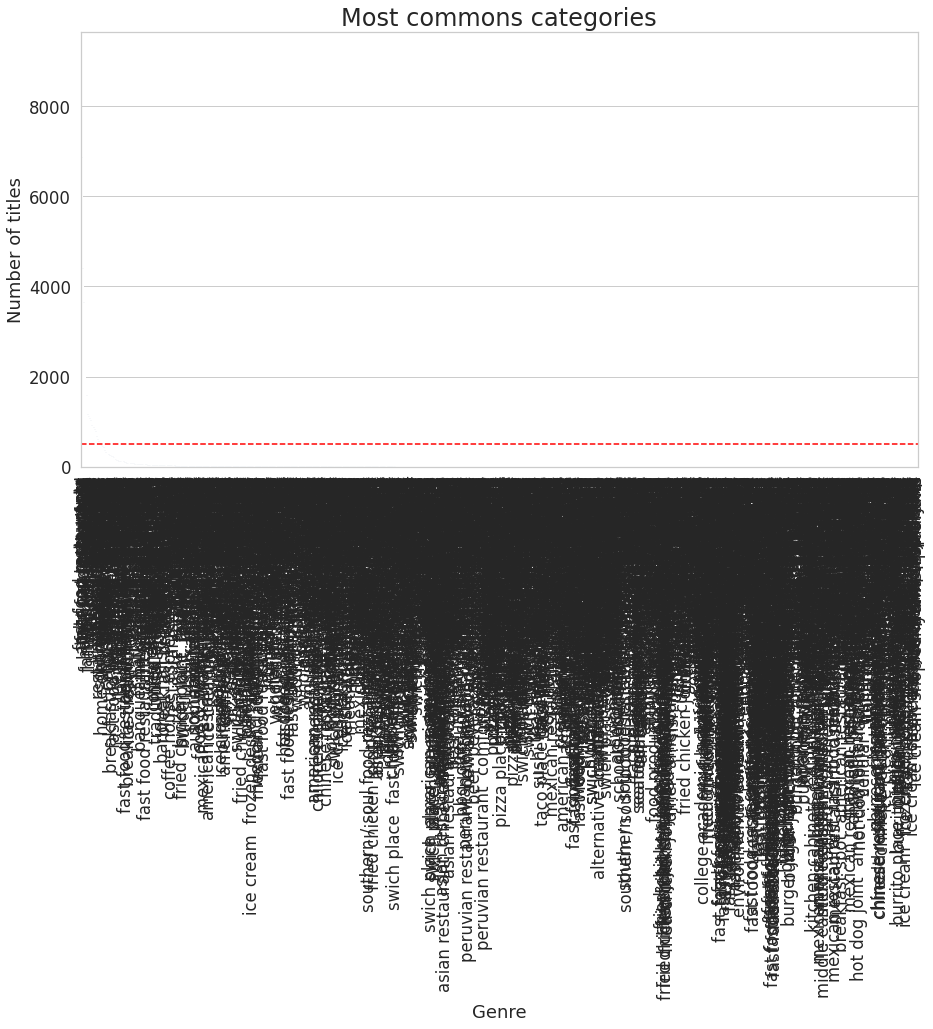

In [21]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') 


pal = sns.color_palette("Blues_r", len(bar_plot))
rank = bar_plot['count'].argsort().argsort()  

sns.barplot(bar_plot['cat'], bar_plot['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("Most commons categories", fontsize=24)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.xticks(rotation='vertical')

plt.show()

In [22]:
main_categories = pd.DataFrame()
main_categories = bar_plot[bar_plot['count']>200]
categories = main_categories['cat'].values
categories = np.append(categories,'Others')
not_category = []
new_df['Others'] = 0

for i in new_df.columns[1:]:
    if i not in categories:
        new_df['Others'][new_df[i] == 1] = 1
        not_category.append(i)

new_df.drop(not_category, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [23]:
most_common_cat = pd.DataFrame()
most_common_cat['cat'] = new_df.columns[1:]
most_common_cat['count'] = new_df.iloc[:,1:].sum().values
most_common_cat.sort_values(['count'], inplace=True, ascending=False)
most_common_cat.reset_index(inplace=True, drop=True)
most_common_cat.head()

,cat,count
0,restaurants,9199
1,fast food restaurants,6885
2,restaurant,4489
3,take out restaurants,4405
4,Others,4196


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


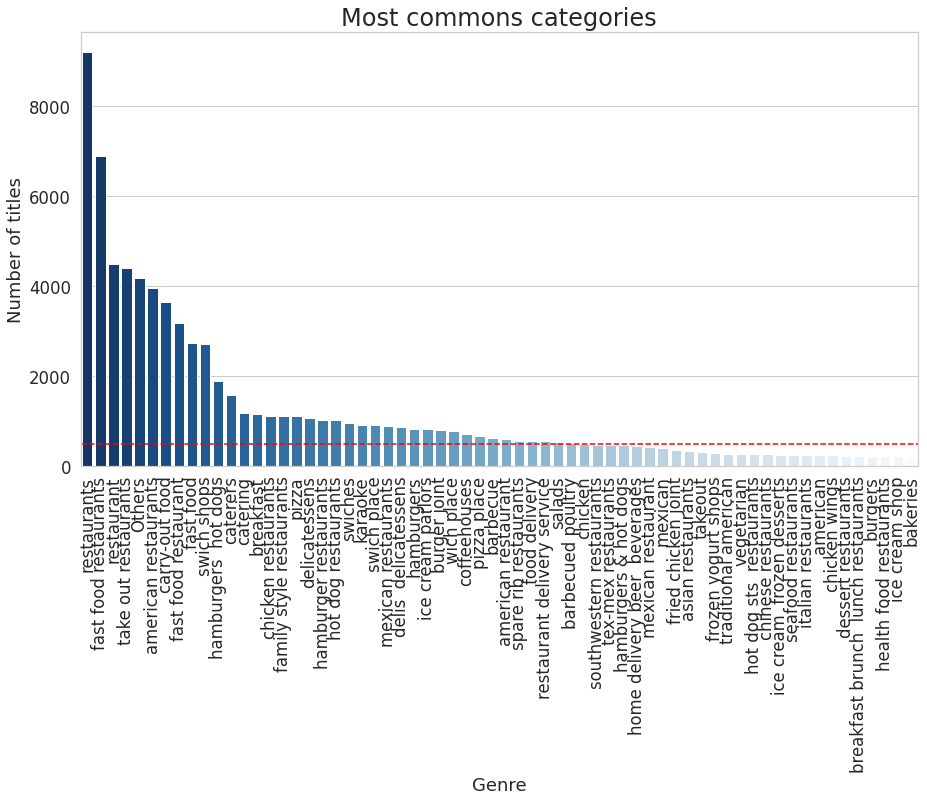

In [24]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') 


pal = sns.color_palette("Blues_r", len(most_common_cat))
rank = most_common_cat['count'].argsort().argsort()  

sns.barplot(most_common_cat['cat'], most_common_cat['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("Most commons categories", fontsize=24)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.xticks(rotation='vertical')

plt.show()

In [25]:
rowSums = new_df.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


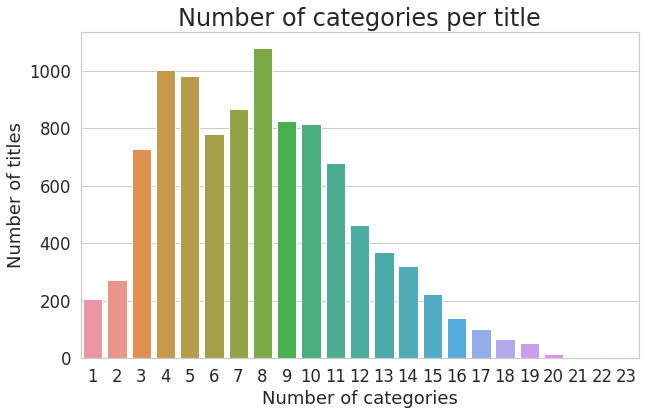

In [26]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') 
plt.figure(figsize=(10,6))

sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Number of categories per title", fontsize=24)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Number of categories', fontsize=18)

plt.show()


In [28]:
boxplot = new_df.copy()
boxplot['len'] = new_df.detailed_address.apply(lambda x: len(x))

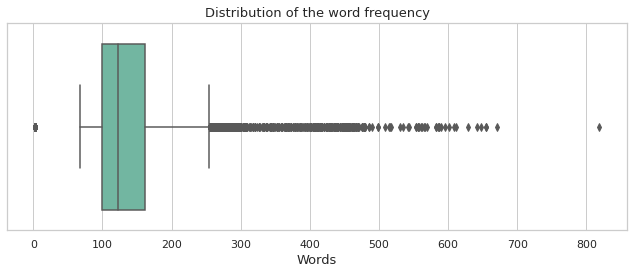

In [29]:
sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})

plt.figure(figsize=(9, 4))

ax = sns.boxplot(x='len', data=boxplot, orient="h", palette="Set2")
plt.ylabel('')
plt.xlabel('Words')
plt.title("Distribution of the word frequency", fontsize=13)
plt.tight_layout(h_pad=3)

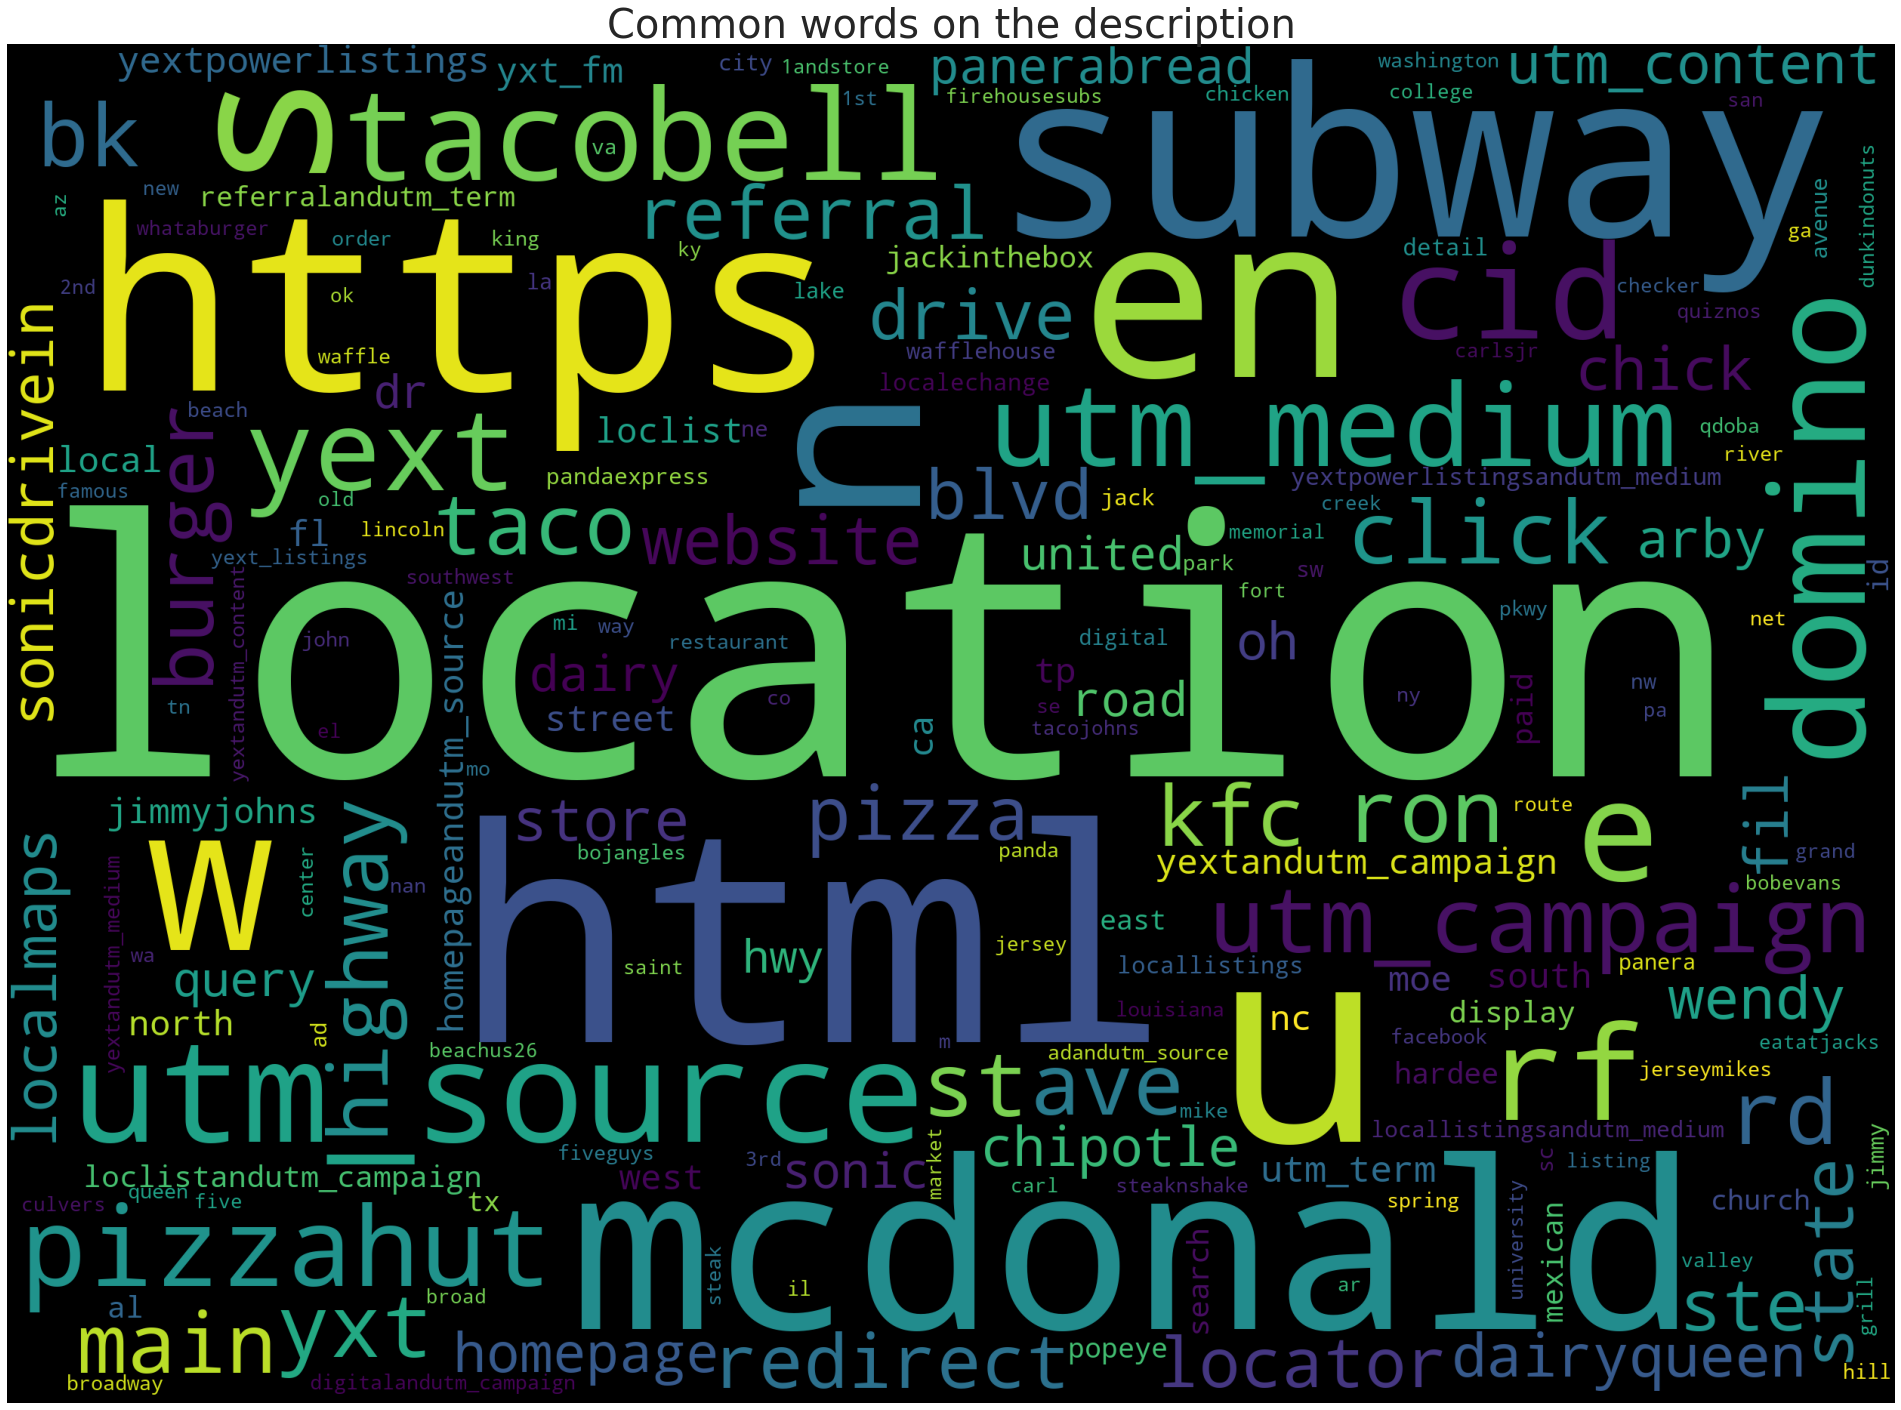

In [31]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))
text = new_df.detailed_address.values
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Common words on the description",fontsize=40)
plt.imshow(cloud)